In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
x = df[['x']].values
y = df.y.values

In [4]:
### edTest(test_random) ###
# Split the data into train and validation sets with 75% for training 
# and with a random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)

In [5]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 20

# Create three empty lists to store training, validation, and cross-validation MSEs
training_error, validation_error, cross_validation_error = [], [], []

# Loop through the degrees of the polynomial
for d in range(maxdeg):  # Iterate over degrees from 1 to maxdeg
    
    # Compute the polynomial features for the entire data
    poly_features = PolynomialFeatures(degree=d)
    x_poly = poly_features.fit_transform(x)  # Transform the full dataset

    # Compute the polynomial features for the train data
    x_poly_train = poly_features.transform(x_train)  # Transform training data

    # Compute the polynomial features for the validation data
    x_poly_val = poly_features.transform(x_val)  # Transform validation data

    # Initialize a Linear Regression object (fit_intercept=False since PolynomialFeatures adds an intercept)
    lreg = LinearRegression(fit_intercept=False)

    # Fit model on the training set
    lreg.fit(x_poly_train, y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train data
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation data
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    # Perform cross-validation on the entire data with 10 folds and get the mse_scores
    mse_score = cross_validate(
        lreg, x_poly, y, cv=10, scoring='neg_mean_squared_error'
    )

    # Compute the mean of the cross-validation error and store it in the list
    cross_validation_error.append(-np.mean(mse_score['test_score']))

In [6]:
### edTest(test_best_degree) ###

# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)

The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


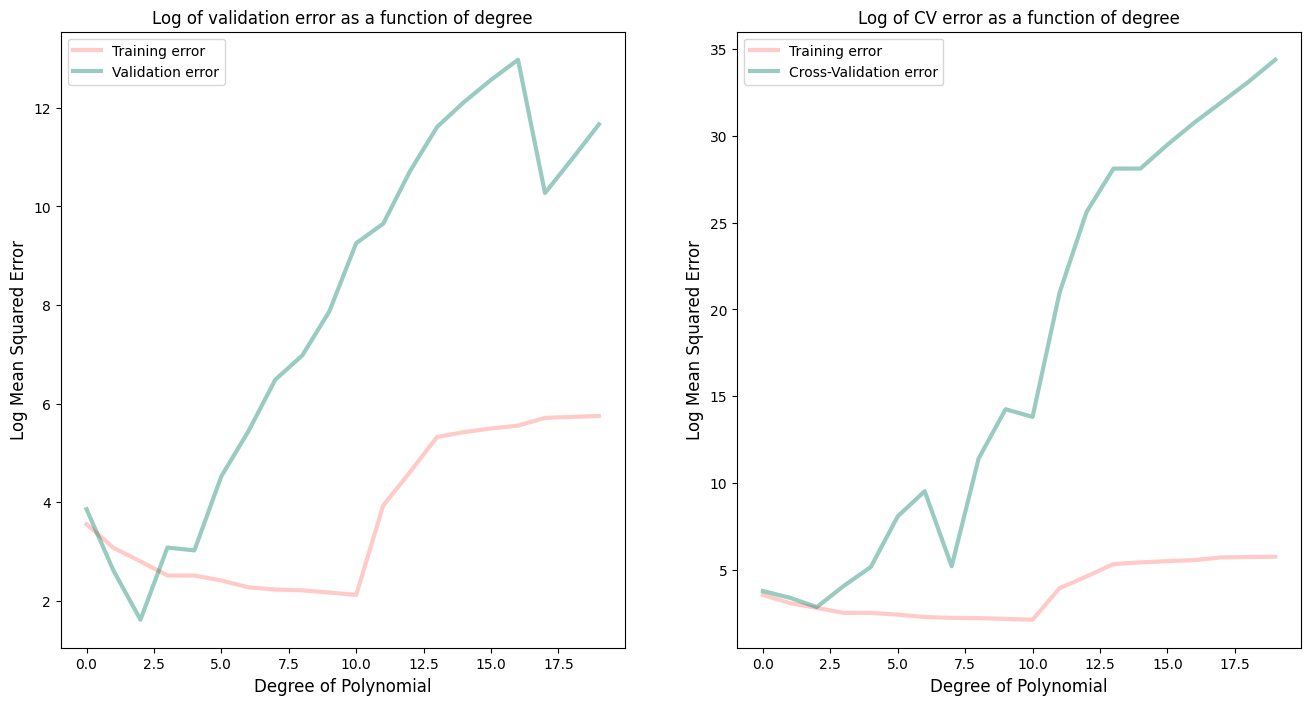

In [7]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();
